In [4]:
'''
    BIRCH clustering is a hierarchial clustering algorithm
    designed for large-scale datasets
'''

'\n    BIRCH clustering is a hierarchial clustering algorithm\n    designed for large-scale datasets\n'

In [2]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
import seaborn as sns



In [3]:
# prepare data for clustering
df = pd.read_csv("data/pbd_outliers_removed.csv")
#cols = [
#    "video_pause_4",
#    "video_play_4",
#    "video_watch_4",
#    "video_completed_4"
#]

cols = [
   "wall_page_load_4",
   "wall_page_load_1",
   "wall_page_load_2",
   "wall_page_load_3",
   "wall_load_more_2",
   "wall_load_more_1",
   "wall_load_more_4",
   "wall_load_more_3",
   "wall_make_post_1",
   "wall_make_post_2",
   "wall_make_post_4"
]

#cols = [
# "video_pause_1",
# "video_completed_1",
# "video_pause_4",
# "video_play_1",
# "video_watch_2",
# "video_watch_3",
# "video_seek_3",
# "video_play_2",
# "video_seek_4",
# "video_watch_1",
# "video_completed_2",
# "video_pause_2",
# "video_play_4",
# "video_play_3",
# "video_pause_3",
# "video_seek_1",
# "video_watch_4",
# "video_seek_2",
# "video_caption_1",
# "video_completed_3",
# "video_caption_2",
# "video_completed_4"
#]


trimmed_df = df[cols]
#scores = df["ALG1_EOC_SCALE_SCORE_22"]

trimmed_df


,wall_page_load_4,wall_page_load_1,wall_page_load_2,wall_page_load_3,wall_load_more_2,wall_load_more_1,wall_load_more_4,wall_load_more_3,wall_make_post_1,wall_make_post_2,wall_make_post_4
0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,19.0,19.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17907,20.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17908,10.0,0.0,0.0,6.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
17909,1.0,0.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17910,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# scales data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(trimmed_df), columns=trimmed_df.columns)

df_scaled


,wall_page_load_4,wall_page_load_1,wall_page_load_2,wall_page_load_3,wall_load_more_2,wall_load_more_1,wall_load_more_4,wall_load_more_3,wall_make_post_1,wall_make_post_2,wall_make_post_4
0,-0.630377,-0.585498,-0.509050,-0.584218,0.0,-0.175343,0.0,0.0,0.0,0.0,0.0
1,-0.683277,-0.654517,-0.746212,-0.692867,0.0,-0.175343,0.0,0.0,0.0,0.0,0.0
2,-0.683277,-0.447461,-0.350943,-0.584218,0.0,-0.175343,0.0,0.0,0.0,0.0,0.0
3,-0.683277,-0.792554,-0.113781,-0.584218,0.0,-0.175343,0.0,0.0,0.0,0.0,0.0
4,-0.630377,0.518799,0.755811,2.023354,0.0,-0.175343,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17907,0.374715,-0.792554,-0.746212,0.719568,0.0,-0.175343,0.0,0.0,0.0,0.0,0.0
17908,-0.154281,-0.792554,-0.746212,-0.040974,0.0,-0.175343,0.0,NaN,0.0,0.0,0.0
17909,-0.630377,-0.792554,-0.588104,0.719568,0.0,-0.175343,0.0,0.0,0.0,0.0,0.0
17910,-0.418779,-0.792554,-0.746212,-0.258272,0.0,-0.175343,0.0,0.0,0.0,0.0,0.0


In [5]:
# remove NaN
# this imputer completes missing values with the mean
imputer = SimpleImputer(strategy="mean")
df_scaled = imputer.fit_transform(df_scaled)

In [6]:
# dimensionality scaling
'''
    Visualizes high-dimensional data by giving each data point a location
    in a two or three-dimensional map. 
'''
# synthetic data for testing
#df_scaled, _ = make_blobs(n_samples=1000, centers=100, random_state=0)

tsne = TSNE(n_components=2, random_state = 0)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled), columns=["TSNE1", "TSNE2"])

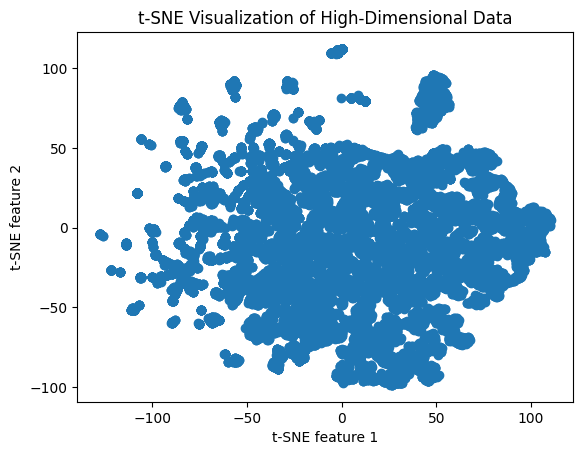

In [8]:
# This plots our TSNE reduced data (for paper)
X_2d = tsne.fit_transform(df_scaled)

# Plot
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE Visualization of High-Dimensional Data')
plt.show()

/tmp/ipykernel_82406/1941322919.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(cluster_mean[0], cluster_mean[1], f'Cluster {cluster_label}', fontsize=10, ha='center', va='center', color='black')
/tmp/ipykernel_82406/1941322919.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(cluster_mean[0], cluster_mean[1], f'Cluster {cluster_label}', fontsize=10, ha='center', va='center', color='black')
/tmp/ipykernel_82406/1941322919.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

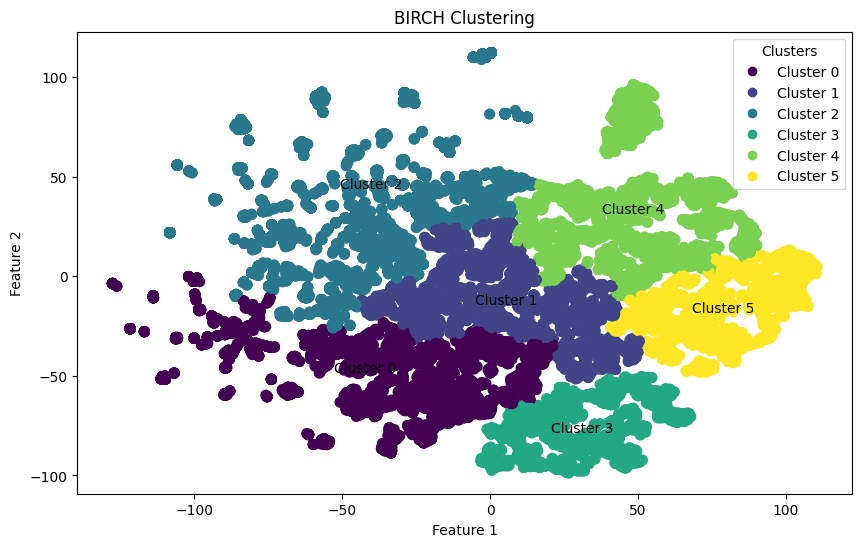

In [10]:
brc = Birch(n_clusters=6)
brc.fit(df_tsne)
labels = brc.predict(df_tsne)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=labels, cmap='viridis', marker='o', s=50)

# Annotate clusters with labels
for cluster_label in np.unique(labels):
    cluster_mean = np.mean(df_tsne.loc[labels == cluster_label, ['TSNE1', 'TSNE2']], axis=0)
    plt.text(cluster_mean[0], cluster_mean[1], f'Cluster {cluster_label}', fontsize=10, ha='center', va='center', color='black')

# Plot details
plt.title('BIRCH Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add legend
legend_labels = [f'Cluster {cluster_label}' for cluster_label in np.unique(labels)]
plt.legend(handles=scatter.legend_elements()[0], title="Clusters", labels=legend_labels)

plt.show()

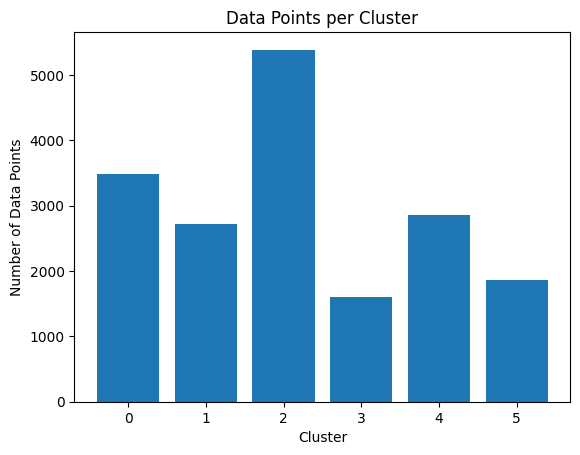

In [11]:
df_tsne['cluster'] = labels
cluster_counts = df_tsne['cluster'].value_counts().sort_index()

# Plotting
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Data Points per Cluster')
plt.show()

In [12]:

# Add cluster labels to the original dataframe
df['cluster'] = labels


In [13]:

# Calculate the mean of each action within each cluster
action_means_by_cluster = df.groupby('cluster')[cols].mean()

# Identify the action with the highest mean in each cluster
highest_actions_by_cluster = action_means_by_cluster.idxmax(axis=1)

# Display the result
print("Action with the highest mean in each cluster:")
print(highest_actions_by_cluster)


Action with the highest mean in each cluster:
cluster
0    wall_page_load_4
1    wall_page_load_4
2    wall_page_load_1
3    wall_page_load_4
4    wall_page_load_1
5    wall_page_load_4
dtype: object


In [14]:

# Assuming 'labels' contains the cluster assignments

# Add cluster labels to the original dataframe
df['cluster'] = labels


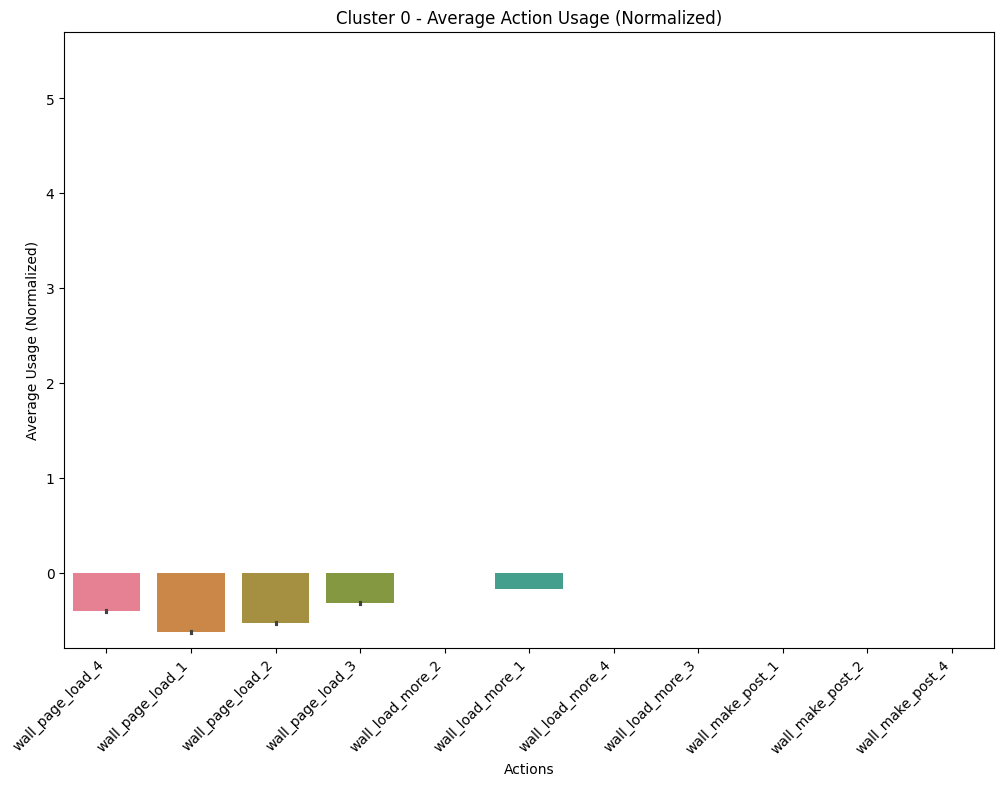

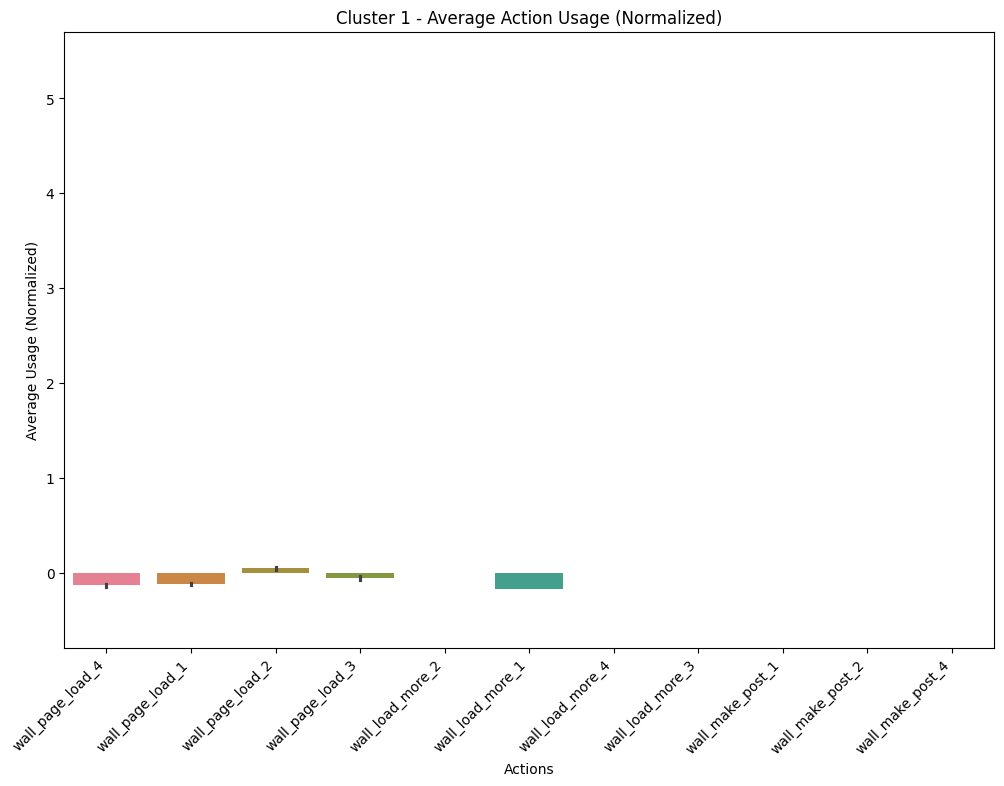

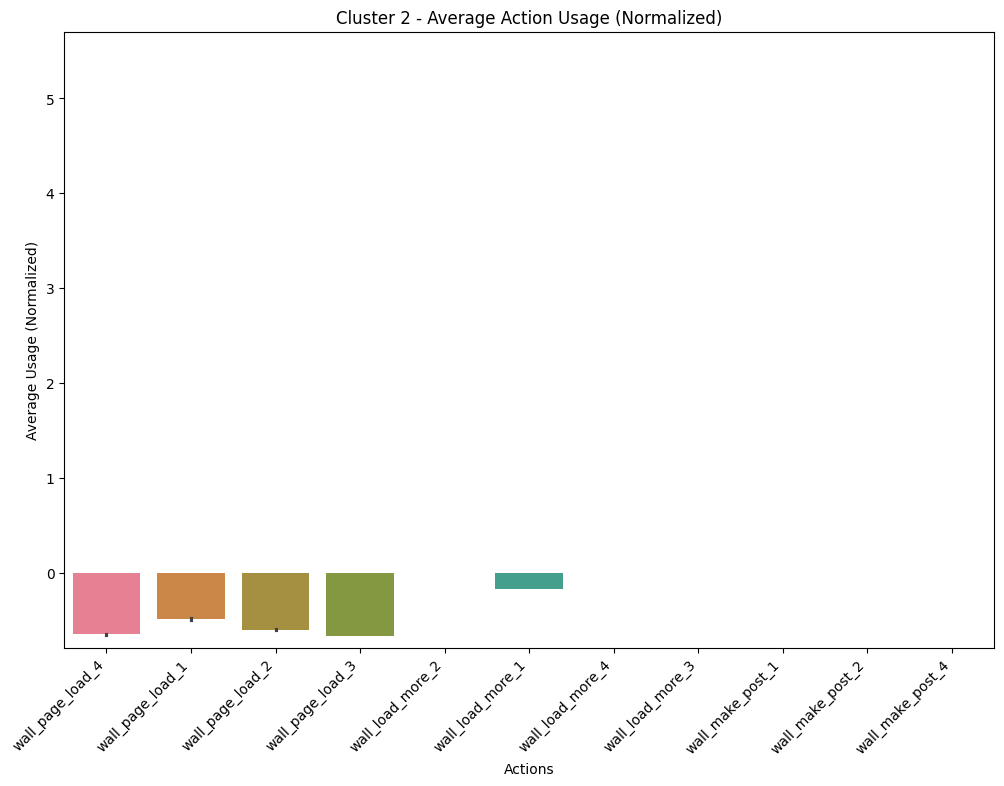

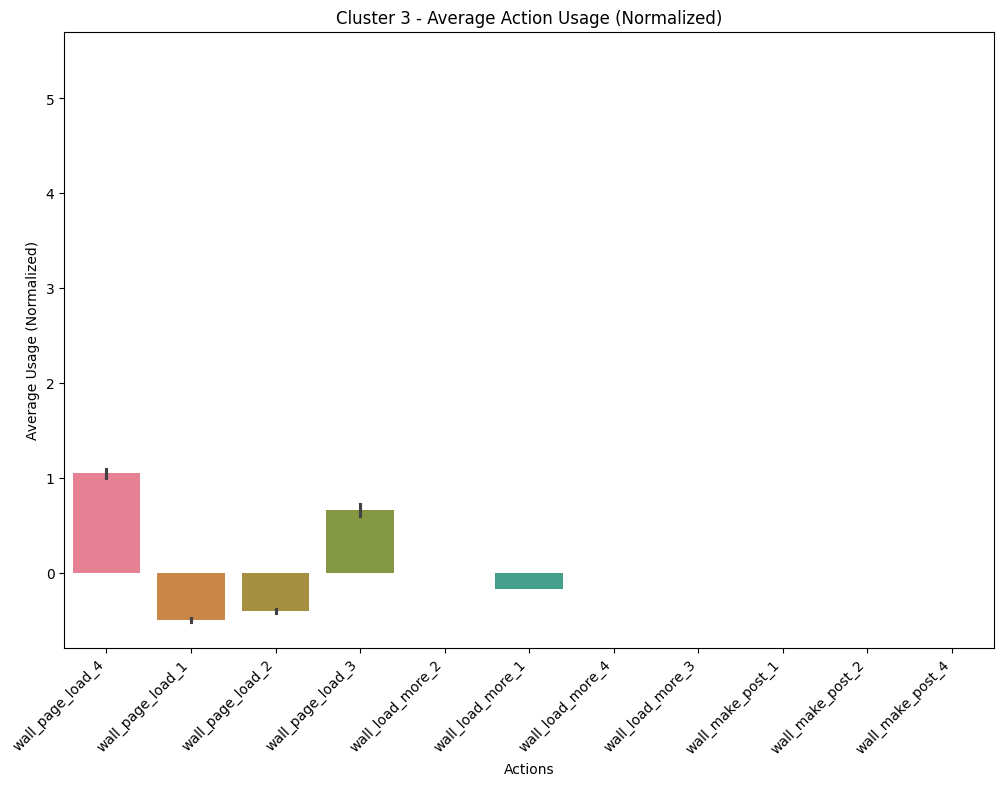

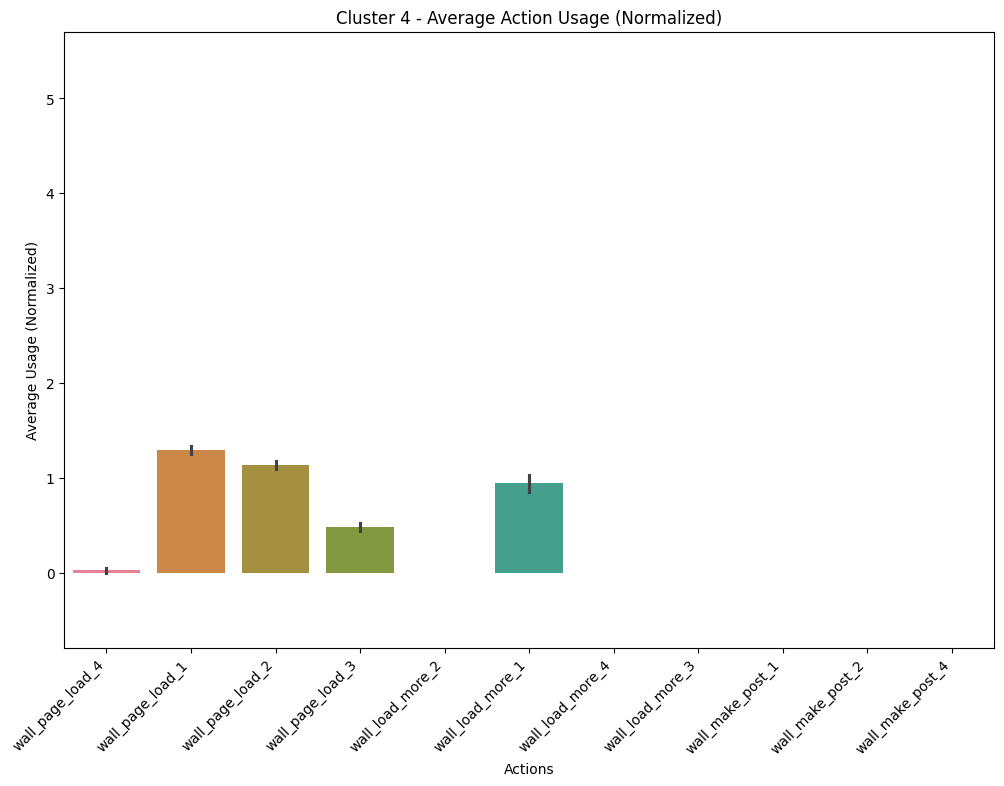

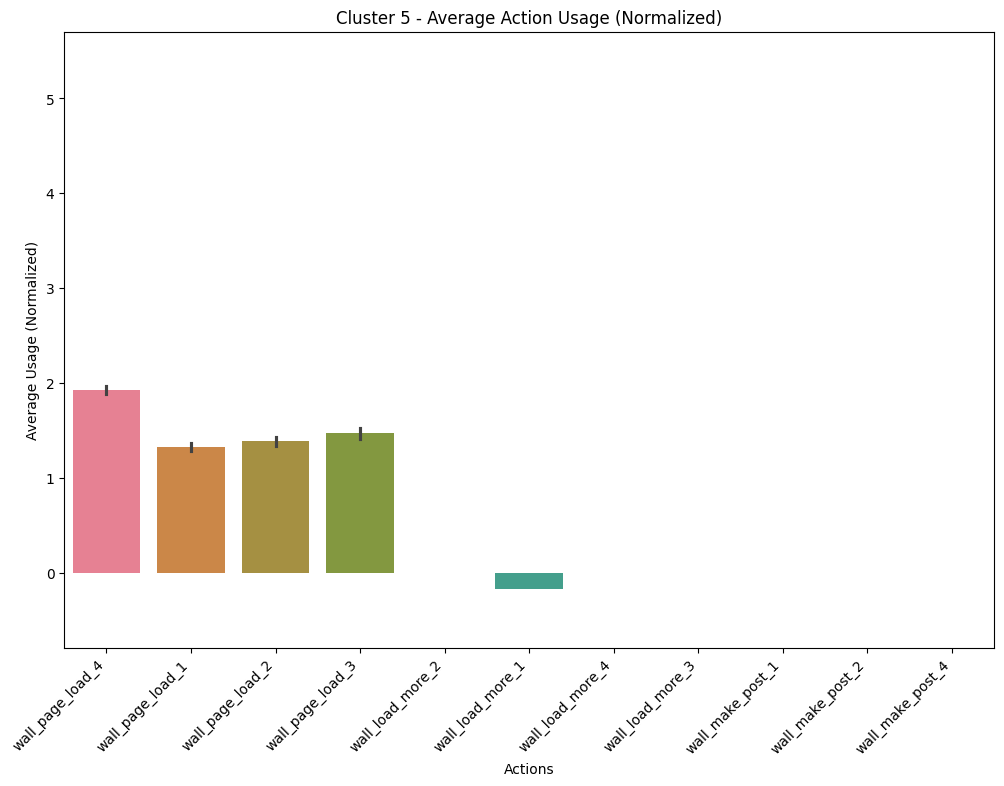

In [15]:
# Initialize the StandardScaler
scaler = StandardScaler()


# Normalize the entire dataset
normalized_data_full = scaler.fit_transform(df[cols])
df_normalized = pd.DataFrame(normalized_data_full, columns=cols)

# Determine the global min and max values for the y-axis
global_min = df_normalized[cols].min().min()
global_max = df_normalized[cols].max().max()
df_normalized['cluster'] = df['cluster']

for cluster_num in range(6):  # Assuming 6 clusters
    # Filter the normalized data for the current cluster
    cluster_data_normalized = df_normalized[df_normalized['cluster'] == cluster_num]

    # Plotting the mean values of the normalized data
    plt.figure(figsize=(12, 8))
    sns.barplot(data=cluster_data_normalized[cols])
    plt.title(f'Cluster {cluster_num} - Average Action Usage (Normalized)')
    plt.xlabel('Actions')
    plt.ylabel('Average Usage (Normalized)')
    plt.ylim(global_min, global_max)  # Set the same y-axis limits for all plots
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()